In [3]:
import pandas as pd #For data
import numpy as np #For operations 
from scipy.stats import trim_mean
import matplotlib.pyplot as plt #For plot

In [32]:
# Sample data
data = {'Name' : ['James', 'Martial', 'Lionel', 'Cristiano', 'Mbappe', 'Haland', 'Diaz', 'Cuadrado', 'James', 'Falcao'],
        'Sons': [1, 2, 3, 4, 5, 6, 7, 8, 9, 30]}
df = pd.DataFrame(data)
df.head()

,Place,Values
0,James,1
1,Martial,2
2,Lionel,3
3,Cristiano,4
4,Mbappe,5


In [33]:
# Mean
mean_value = df['Values'].mean()

# Median
median_value = df['Values'].median()

# Trimmed Mean (20%)
trimmed_mean_value = trim_mean(df['Values'], proportiontocut=0.2)

# Mean Absolute Deviation
mad_value = df['Values'].mad() if hasattr(df['Values'], 'mad') else np.mean(np.abs(df['Values'] - mean_value))

# Standard Deviation
std_dev_value = df['Values'].std()

# Quantiles (25%, 50%, 75%)
quantiles = df['Values'].quantile([0.25, 0.5, 0.75])

In [34]:
# Display the results
results = {
    'Mean': mean_value,
    'Median': median_value,
    'Trimmed Mean (10%)': trimmed_mean_value,
    'Mean Absolute Deviation': mad_value,
    'Standard Deviation': std_dev_value,
    '25% Quantile': quantiles[0.25],
    '50% Quantile (Median)': quantiles[0.5],
    '75% Quantile': quantiles[0.75]
}

results_df = pd.DataFrame(results, index=[0])
results_df.head()

,Mean,Median,Trimmed Mean (10%),Mean Absolute Deviation,Standard Deviation,25% Quantile,50% Quantile (Median),75% Quantile
0,7.5,5.5,5.5,4.9,8.31665,3.25,5.5,7.75


In [35]:
frecuency_table = df['Values'].value_counts().sort_index()

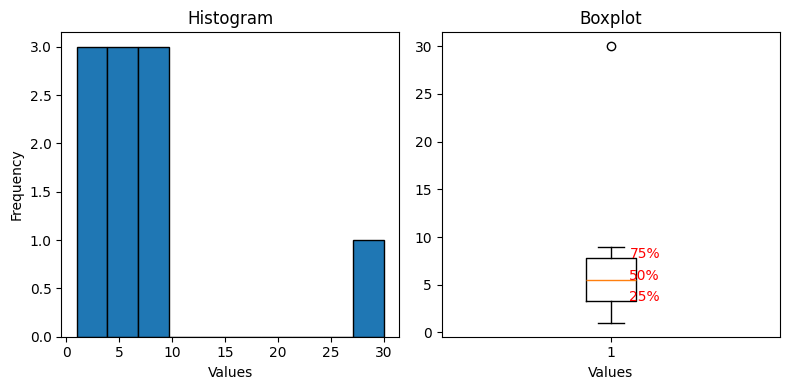

In [36]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (8, 4))

# Histogram
axes[0].hist(df['Values'], bins=10, edgecolor='black')
axes[0].set_title('Histogram')
axes[0].set_xlabel('Values')
axes[0].set_ylabel('Frequency')

# Boxplot
axes[1].boxplot(df['Values'])
axes[1].set_title('Boxplot')
axes[1].set_xlabel('Values')

# Adding percentile annotations to the boxplot
for percentile, value in quantiles.items():
    axes[1].text(1.1, value, f'{int(percentile*100)}%', horizontalalignment='center', color='r')

plt.tight_layout()